## Proyecto final Mineria de datos

Prediccion de renuncias

Importamos las librerias necesarias para el procesamiento

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#----Scalers y Encoders para preprocesamiento------#
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_validate

#----------------------------------------_---------#
from imblearn.over_sampling import SMOTE

#---------- Algoritmos de Clasificacion -----------#
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import silhouette_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn.cluster import KMeans


import pickle

## Ingesta de datos

Se cargan los datos posteriores al procesamiento hecho en la plataforma dataiku

In [33]:
data=pd.read_csv(r'data/predictive_data_joined_prepared.csv', sep=',')
data['Retired'].replace({1:'Retired',0:'Not Retired'},inplace=True)

In [34]:
data.dtypes.sort_index()

Age                          int64
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction    float64
Gender                      object
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction            float64
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked           int64
PercentSalaryHike            int64
PerformanceRating            int64
Retired                     object
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance            float64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
dtype: object

In [35]:
for i in data.columns:
    if data[i].dtype==object:
        data[i]=data[i].astype('category')

In [36]:
data.drop(columns=['StandardHours'],inplace=True)

## Seleccion de Factores

Identificar los factores clave de las renuncias de  personal.

In [37]:
df_corr=data.copy()

In [38]:
dropf=['Gender','Retired']
notdropf=['BusinessTravel','Department','EducationField',
          'JobRole','MaritalStatus']

In [41]:
df_corr.describe()

,JobInvolvement,PerformanceRating,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,2.729932,3.153741,36.923810,9.192517,2.912925,2.063946,65029.312925,2.683220,15.209524,0.793878,11.256916,2.799320,7.008163,2.187755,4.123129,2.725170,2.734014,2.763492
std,0.711400,0.360742,9.133301,8.105026,1.023933,1.106689,47068.888559,2.499737,3.659108,0.851883,7.790928,1.288978,6.125135,3.221699,3.567327,1.089852,1.102071,0.703541
min,1.000000,3.000000,18.000000,1.000000,1.000000,1.000000,10090.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,2.000000,3.000000,30.000000,2.000000,2.000000,1.000000,29110.000000,1.000000,12.000000,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,2.000000,2.000000
50%,3.000000,3.000000,36.000000,7.000000,3.000000,2.000000,49190.000000,2.000000,14.000000,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000
75%,3.000000,3.000000,43.000000,14.000000,4.000000,3.000000,83800.000000,4.000000,18.000000,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000,4.000000,4.000000,3.000000
max,4.000000,4.000000,60.000000,29.000000,5.000000,5.000000,199990.000000,9.000000,25.000000,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000


In [8]:
df_corr=pd.get_dummies(df_corr, columns=notdropf, drop_first=False,dtype=int)
df_corr=pd.get_dummies(df_corr, columns=dropf, drop_first=True,dtype=int)

In [9]:
df_corr.corr().iloc[:,-1:].abs().sort_values(by='Retired_Retired')

,Retired_Retired
StockOptionLevel,0.002172
JobRole_Laboratory Technician,0.003482
DistanceFromHome,0.004398
EducationField_Marketing,0.004832
Gender_Male,0.007092
EducationField_Medical,0.007377
JobLevel,0.009296
JobRole_Sales Representative,0.011686
EducationField_Life Sciences,0.012745
JobRole_Human Resources,0.012799


Segun nuestro analisis de correlacion, _las variables mas representativas para definir si un recurso abandonara o no la compañia_ son:

In [10]:
df_corr.corr().iloc[:,-1:].abs().sort_values(by='Retired_Retired').tail(6)

,Retired_Retired
YearsAtCompany,0.128184
Age,0.141897
YearsWithCurrManager,0.144643
TotalWorkingYears,0.158626
MaritalStatus_Single,0.162858
Retired_Retired,1.000000


Y se consideraron variables irrelevantes las que tengan una correlacion con la variable objetivo `<0.01`

In [11]:
#Serian:
# Variables irrelevantes con correlacion < 0.01 con la variable objetivo
irrelevantes = df_corr.corr().iloc[:, -1:].abs()
irrelevantes = irrelevantes[irrelevantes['Retired_Retired'] < 0.01]
irrelevantes

,Retired_Retired
DistanceFromHome,0.004398
JobLevel,0.009296
StockOptionLevel,0.002172
EducationField_Marketing,0.004832
EducationField_Medical,0.007377
JobRole_Laboratory Technician,0.003482
Gender_Male,0.007092


por lo que las variable irrelevantes para los ejercicios de clasificacion son:

- `DistanceFromHome`

- `JobLevel`

- `StockOptionLevel`

- `Gender`


In [12]:
to_drop=['DistanceFromHome','JobLevel','StockOptionLevel','Gender']

## Mineria

### **Descriptiva (Clustering)**

Para los metodos de clustering, se utilizaran todas las variables, iniciales sin el dropeo por irrelevancia
Se utilizara el metodo del codo para seleccionar el Numero de clusters y porterior mente se ejcutara el modelo y se dara una descripcion de los clusters identificados

In [39]:
dfc=df_corr.drop(columns=['Retired_Retired'])

KeyError: "['Retired_Retired'] not found in axis"

In [14]:
#1. Normalizamos las variables numericas
#1.
variables_numericas=[i for i in dfc.columns if dfc[i].dtype != "category"]
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(dfc[variables_numericas]) 
dfc[variables_numericas]= min_max_scaler.transform(dfc[variables_numericas]) 

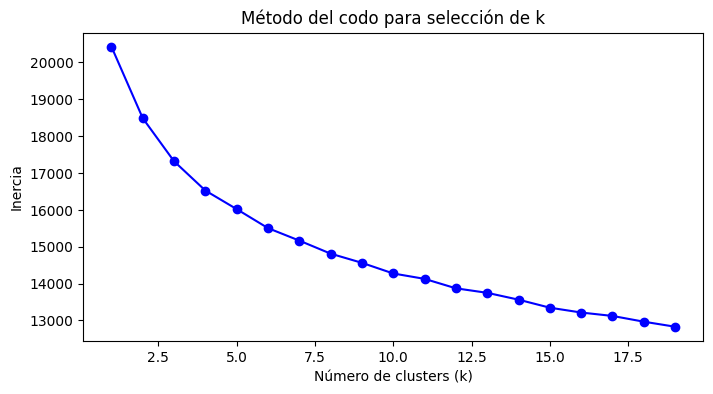

In [15]:
# Método del codo para determinar el número óptimo de clusters
inertia = []
K = range(1, 20)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(dfc)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del codo para selección de k')
plt.show()

La cantidad de clusters a seleccionar no son claras, pero por el entendimiento de negocio se seleccionaron 3 clusters para poder realizar pocas estrategias de retencion en un inicio, con el fin de minimizar costos

In [16]:
kmeans_final = KMeans(n_clusters=3,max_iter=300, random_state=42,n_init='auto')  # Inicializar KMeans con el número de clusters
kmeans_final.fit(dfc)


KMeans(n_clusters=3, n_init='auto', random_state=42)

In [17]:
print("Metricas de evaluacion:")
print("Inercia:", kmeans_final.inertia_)
print("Silhouette Score:", silhouette_score(dfc, kmeans_final.labels_))

Metricas de evaluacion:
Inercia: 17578.335514652514
Silhouette Score: 0.10904124737457198


In [18]:
centroides=pd.DataFrame(kmeans_final.cluster_centers_, columns=dfc.columns) #Convertir los centroides en un DataFrame
centroides.round(1)

,JobInvolvement,PerformanceRating,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,...,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Gender_Male
0,0.6,0.2,0.5,0.3,0.5,0.3,0.3,0.3,0.3,0.3,...,0.1,0.1,0.0,0.2,0.2,0.1,0.0,1.0,0.0,0.6
1,0.6,0.1,0.5,0.3,0.5,0.3,0.3,0.3,0.3,0.3,...,0.1,0.1,0.0,0.2,0.2,0.1,1.0,-0.0,0.0,0.6
2,0.6,0.2,0.4,0.3,0.5,0.3,0.3,0.3,0.3,0.3,...,0.1,0.1,0.1,0.2,0.2,0.1,-0.0,-0.0,1.0,0.6


In [19]:
centroides[variables_numericas]=min_max_scaler.inverse_transform(centroides[variables_numericas]) #Deshacer la estandarizacion de las variables numericas
centroides.round(0)

,JobInvolvement,PerformanceRating,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,...,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Gender_Male
0,3.0,3.0,38.0,10.0,3.0,2.0,66063.0,3.0,15.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,3.0,3.0,37.0,9.0,3.0,2.0,68010.0,3.0,15.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.0,0.0,1.0
2,3.0,3.0,35.0,9.0,3.0,2.0,61475.0,3.0,15.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,1.0,1.0


AQUI SE AGREGARA LA DESCRIPCION DE LOS CENTROIDES

In [20]:
dfc['cluster'] = kmeans_final.labels_

<Axes: ylabel='count'>

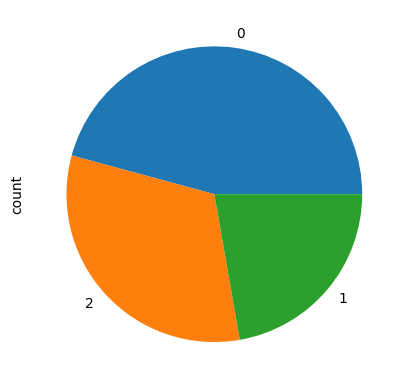

In [21]:
dfc.cluster.value_counts().plot(kind='pie')

### **Predictiva (Clasificacion)**


1. **Preparación de datos:** variables numéricas se deben normalizar, variables categórcias se crean dummies, abalancer la variable objetivo en caso de ser necesario
2. **Aprendizaje del Modelo:** Kmeans, método del codo/rodilla
3. **Evaluación del Modelo:** Inertia, silueta
4. **Perfilamiento:** Descripción de centroides

#### Preparacion

In [22]:
dfc=data.drop(columns=to_drop)

In [23]:
notdropf=['BusinessTravel','Department','EducationField',
          'JobRole','MaritalStatus']

In [24]:
dfc=pd.get_dummies(dfc, columns=notdropf, drop_first=False,dtype=int)

In [25]:
#1.
variables_numericas=[i for i in dfc.columns if dfc[i].dtype != "category"]
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(dfc[variables_numericas]) 
dfc[variables_numericas]= min_max_scaler.transform(dfc[variables_numericas]) 

In [26]:
le = LabelEncoder()
le.fit(dfc['Retired'])
dfc['Retired']=le.transform(dfc['Retired'])

In [27]:
print(
    f'Las columnas despues de la obtencion de dummies y\nla eliminacion de variables irrelevantes pasaron de {data.columns.size} a {dfc.columns.size}'
)

Las columnas despues de la obtencion de dummies y
la eliminacion de variables irrelevantes pasaron de 25 a 40


'Segun la grafica se necesita hacer un balanceo  de clases para poder entrenar mejor el modelo'

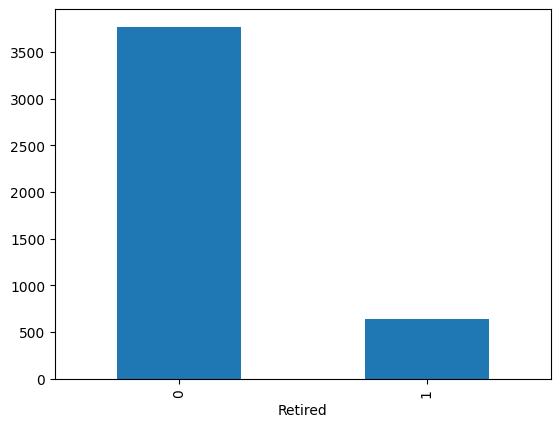

In [28]:
dfc['Retired'].value_counts().plot(kind='bar')

"""Segun la grafica se necesita hacer un balanceo  de clases para poder entrenar mejor el modelo"""

In [29]:
X = dfc.drop(columns=['Retired'])
y = dfc['Retired']

In [30]:
# Balanceamos los registros de la variable objetiv

smote = SMOTE(sampling_strategy=0.55, random_state=42,k_neighbors=3)
X_balanced, y_balanced = smote.fit_resample(X, y)

print('Distribución original:', y.value_counts())
print('Distribución balanceada:', y_balanced.value_counts())

Distribución original: Retired
0    3769
1     641
Name: count, dtype: int64
Distribución balanceada: Retired
0    3769
1    2072
Name: count, dtype: int64


<Axes: xlabel='Retired'>

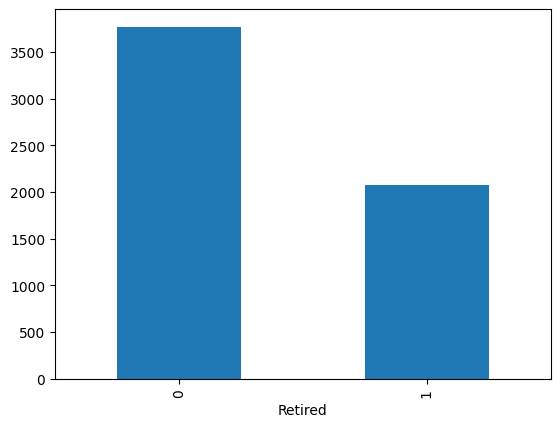

In [31]:
y_balanced.value_counts().plot(kind='bar')

In [32]:
X_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5841 entries, 0 to 5840
Data columns (total 39 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   JobInvolvement                     5841 non-null   float64
 1   PerformanceRating                  5841 non-null   float64
 2   Age                                5841 non-null   float64
 3   Education                          5841 non-null   float64
 4   MonthlyIncome                      5841 non-null   float64
 5   NumCompaniesWorked                 5841 non-null   float64
 6   PercentSalaryHike                  5841 non-null   float64
 7   TotalWorkingYears                  5841 non-null   float64
 8   TrainingTimesLastYear              5841 non-null   float64
 9   YearsAtCompany                     5841 non-null   float64
 10  YearsSinceLastPromotion            5841 non-null   float64
 11  YearsWithCurrManager               5841 non-null   float

#### **Entrenamiento**

Se entrenaran 3 modelos de clasificacion diferentes:

- Neural Networks
- Regresion Logistica
- KNN

----------

Como se hara el entrenamiento?:

- Validación cruzada.

    - Entrenar y evaluar varios modelos/hiperparámetros.

- Seleccionar el mejor modelo.

##### Regresion Logistica

              precision    recall  f1-score   support

           0       0.77      0.85      0.81      3769
           1       0.66      0.54      0.60      2072

    accuracy                           0.74      5841
   macro avg       0.72      0.70      0.70      5841
weighted avg       0.73      0.74      0.73      5841



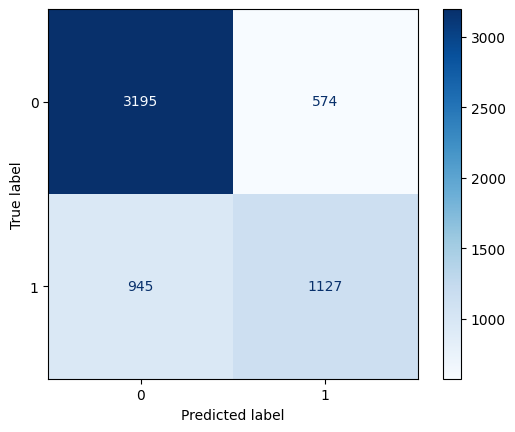

In [104]:
# Realiza validación cruzada para regresión logística (clasificación binaria)

model = LogisticRegression()

# Obtiene predicciones "como si fueran test" en cada fold
y_pred_cv = cross_val_predict(model, X_balanced, y_balanced, cv=10)

# Reporte de métricas
print(classification_report(y_balanced, y_pred_cv))

# Matriz de confusión
cm = confusion_matrix(y_balanced, y_pred_cv)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")

##### MultiLayer Perceptron (Redes Neuronales)

In [105]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
""" Con GridSearch Vamos a probar diferentes arquitecturas y a elegir la mejor
    (20,) -> Metodo Heuristico donde la cantidad de neuronas es el promedio entre las neuronas de entrada y las de salida
    (20,10) -> Metodo Heuristico Pero le damos capacidad de captar relaciones no lineales
    (64,) -> Metodo un poco mas robusto estamos probando neuronas de la capa oculta iguales a 1.6x las entradas
    (64, 32) -> Metodo mas robusto 

"""
param_grid = {
    'hidden_layer_sizes': [(20,),(20,10),(64,), (64, 32)]
}

mlp = MLPClassifier(
    activation='logistic',
    learning_rate='adaptive', learning_rate_init=0.2, 
    momentum=0.3, max_iter=500, random_state=3, early_stopping=True, alpha=0.001
)

grid = GridSearchCV(mlp, param_grid, scoring='f1', cv=5)
grid.fit(X_balanced, y_balanced)
print("Mejores parámetros:", grid.best_params_)


Mejores parámetros: {'hidden_layer_sizes': (64, 32)}


In [106]:
#Evaluamos el modelo con los parametros seleccionados
mlp = MLPClassifier(
    hidden_layer_sizes=(64,32),
    activation='logistic',
    learning_rate='adaptive', learning_rate_init=0.2, 
    momentum=0.3, max_iter=500, random_state=3, early_stopping=True, alpha=0.001
)

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      3769
           1       0.89      0.75      0.81      2072

    accuracy                           0.88      5841
   macro avg       0.88      0.85      0.86      5841
weighted avg       0.88      0.88      0.88      5841



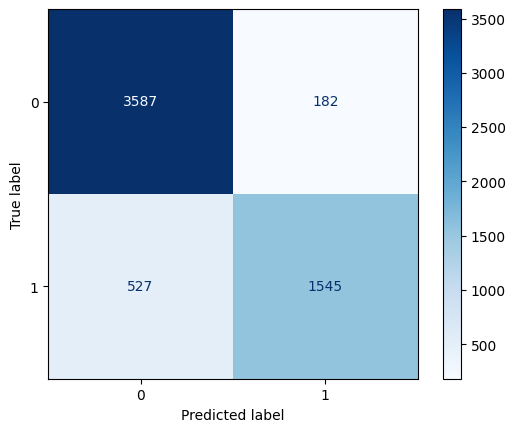

In [107]:
# Obtiene predicciones "como si fueran test" en cada fold
y_pred_cv = cross_val_predict(mlp, X_balanced, y_balanced, cv=10)

# Reporte de métricas
print(classification_report(y_balanced, y_pred_cv))

# Matriz de confusión
cm = confusion_matrix(y_balanced, y_pred_cv)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")

##### KNearestNeighbors (Lazy)

              precision    recall  f1-score   support

           0       0.99      0.84      0.91      3769
           1       0.77      0.98      0.87      2072

    accuracy                           0.89      5841
   macro avg       0.88      0.91      0.89      5841
weighted avg       0.91      0.89      0.89      5841



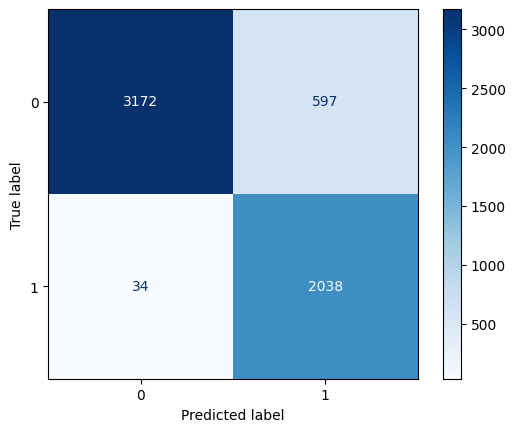

In [108]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

# Obtiene predicciones "como si fueran test" en cada fold
y_pred_cv = cross_val_predict(knn, X_balanced, y_balanced, cv=10)

# Reporte de métricas
print(classification_report(y_balanced, y_pred_cv))

# Matriz de confusión
cm = confusion_matrix(y_balanced, y_pred_cv)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")

## Despliegue

El modelo seleccionado fue un K Nearest Neighbors por lo que se guardara en un archivo .pickle para su posterior despliegue

In [109]:
filename='modelo_final.pickle'

In [110]:
knn_despliegue = KNeighborsClassifier(n_neighbors=5)

knn_despliegue.fit(X_balanced,y_balanced)


variables = X.columns.values
pickle.dump([le,variables,min_max_scaler,knn_despliegue], open(filename, 'wb'))